### London Housing market overview 2006-2022 monthly stats

Source: [Land Registry House Price Index](https://landregistry.data.gov.uk/app/ukhpi)

#### Loading and cleaning data

In [1]:
# Import relevant modules

import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
# We will create one Pandas DataFrame for the UK, London, and each region within London

uk_df = pd.read_csv('../../Datasets/02_clean_data_files/landregistry_uk_monthly_stats.csv')
london_df = pd.read_csv('../../Datasets/02_clean_data_files/landregistry_london_monthly_stats.csv')
outerlondon_df = pd.read_csv('../../Datasets/02_clean_data_files/landregistry_outer_london_monthly_stats.csv')
innerlondon_df = pd.read_csv('../../Datasets/02_clean_data_files/landregistry_inner_london_monthly_stats.csv')
cityoflondon_df = pd.read_csv('../../Datasets/02_clean_data_files/landregistry_city_of_london_monthly_stats.csv')

In [3]:
# Create function to reformat the dataframes previously created

def clean_lr_df(data):
    data.drop(columns=['URI', 'Region GSS code', 'Reporting period'], inplace=True)
    data.rename(columns={'Name': 'Region'}, inplace=True)
    data['Pivotable date'] = pd.to_datetime(data['Pivotable date'], format='%Y-%m-%d')
    data['Period'] = pd.to_datetime(data['Period'], format='%Y-%m')
    data.set_index(['Pivotable date'], inplace=True)

In [4]:
# Applying the function defined above to reformat the data

clean_lr_df(uk_df)
clean_lr_df(london_df)
clean_lr_df(innerlondon_df)
clean_lr_df(outerlondon_df)
clean_lr_df(cityoflondon_df)

In [ ]:
# Checking the data

# Unfortunately we can see that some information is missing, in particular, in regards to prices paid by first-time buyers vs former owner-occupiers. But the core information
# that we intended to analyse is complete, therefore we can use these datasets for the analysis.

In [5]:
uk_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 204 entries, 2006-01-01 to 2022-12-01
Data columns (total 52 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   Region                                              204 non-null    object        
 1   Period                                              204 non-null    datetime64[ns]
 2   Sales volume                                        204 non-null    int64         
 3   Average price All property types                    204 non-null    int64         
 4   Percentage change (yearly) All property types       204 non-null    float64       
 5   Percentage change (monthly) All property types      204 non-null    float64       
 6   House price index All property types                204 non-null    float64       
 7   Sales volume All property types                     204 non-null    int64      

In [6]:
london_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 204 entries, 2006-01-01 to 2022-12-01
Data columns (total 52 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   Region                                              204 non-null    object        
 1   Period                                              204 non-null    datetime64[ns]
 2   Sales volume                                        204 non-null    int64         
 3   Average price All property types                    204 non-null    int64         
 4   Percentage change (yearly) All property types       204 non-null    float64       
 5   Percentage change (monthly) All property types      204 non-null    float64       
 6   House price index All property types                204 non-null    float64       
 7   Sales volume All property types                     204 non-null    int64      

In [7]:
outerlondon_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 204 entries, 2006-01-01 to 2022-12-01
Data columns (total 52 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   Region                                              204 non-null    object        
 1   Period                                              204 non-null    datetime64[ns]
 2   Sales volume                                        204 non-null    int64         
 3   Average price All property types                    204 non-null    int64         
 4   Percentage change (yearly) All property types       204 non-null    float64       
 5   Percentage change (monthly) All property types      204 non-null    float64       
 6   House price index All property types                204 non-null    float64       
 7   Sales volume All property types                     204 non-null    int64      

In [8]:
innerlondon_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 204 entries, 2006-01-01 to 2022-12-01
Data columns (total 52 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   Region                                              204 non-null    object        
 1   Period                                              204 non-null    datetime64[ns]
 2   Sales volume                                        204 non-null    int64         
 3   Average price All property types                    204 non-null    int64         
 4   Percentage change (yearly) All property types       204 non-null    float64       
 5   Percentage change (monthly) All property types      204 non-null    float64       
 6   House price index All property types                204 non-null    float64       
 7   Sales volume All property types                     204 non-null    int64      

In [9]:
cityoflondon_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 204 entries, 2006-01-01 to 2022-12-01
Data columns (total 52 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   Region                                              204 non-null    object        
 1   Period                                              204 non-null    datetime64[ns]
 2   Sales volume                                        204 non-null    int64         
 3   Average price All property types                    204 non-null    int64         
 4   Percentage change (yearly) All property types       204 non-null    float64       
 5   Percentage change (monthly) All property types      204 non-null    float64       
 6   House price index All property types                204 non-null    float64       
 7   Sales volume All property types                     204 non-null    int64      

### Analysis and visualisation

#### 1. How did the House Price Index and the average price paid evolve in London by region and compared to the rest of the UK?

Overall, the House Price Index in London follows the general trend of the HPI in the rest of the UK, however, the average price paid in London remained significantly higher than the rest of the UK. By the end of 2022, the average price of a property in the UK was £289.956, while in London it was £535.407. In Inner London the average price was £622.388, in Outer London it was £491.926, while in the City of London the average price paid was £953.985.
During the period analysed, we can see the decline of prices in all regions due to the 2008 financial crisis, while they slowly started to recover during the second half of 2009, which corresponds to the moment when the UK officially came out of recession (last quarter of 2009). Source: [parliament.uk](https://www.parliament.uk/globalassets/documents/commons/lib/research/key_issues/key-issues-recession-and-recovery.pdf). However, it took the UK's GDP 5 years to recover to pre-crisis levels, which finally happened in September 2013. Source: [ons.gov.uk](https://www.ons.gov.uk/economy/grossdomesticproductgdp/articles/the2008recession10yearson/2018-04-30#:~:text=GDP%20took%20five%20years%20to,it%20was%20before%20the%20recession.) At this point, we see the start of a period of rapid growth in the house price index.
Until 2020, we see no significant differences in the HPI between Inner and Outer London, however, since that year we can see that prices in Outer London started to increase at a faster rate.
From the start of the Covid-19 pandemic in March 2020 to September 2022, the average price paid in Inner London increased by 9.1%, while in Outer London, it increased by 16.4% 
This is due to the relative affordability of Outer London compared to Inner London, which means that as prices rise, buyers are pushed further out of the centre.
Additionally, the adoption of remote work during the Covid-19 pandemic, means that people do not mind living further away.

In [10]:
# Obtain average price December 2022 for UK, London, Inner London, Outer London, City of London, all property types.

uk_dec22avg = uk_df.loc['2022-12-01', 'Average price All property types']
london_dec22avg = london_df.loc['2022-12-01', 'Average price All property types']
innerlondon_dec22avg = innerlondon_df.loc['2022-12-01', 'Average price All property types']
outerlondon_dec22avg = outerlondon_df.loc['2022-12-01', 'Average price All property types']
cityoflondon_dec22avg = cityoflondon_df.loc['2022-12-01', 'Average price All property types']

print(f'UK: £{uk_dec22avg}.')
print(f'London: £{london_dec22avg}.')
print(f'Inner London: £{innerlondon_dec22avg}.')
print(f'Outer London: £{outerlondon_dec22avg}.')
print(f'City of London: £{cityoflondon_dec22avg}')

UK: £289956.
London: £535407.
Inner London: £622388.
Outer London: £491926.
City of London: £953985


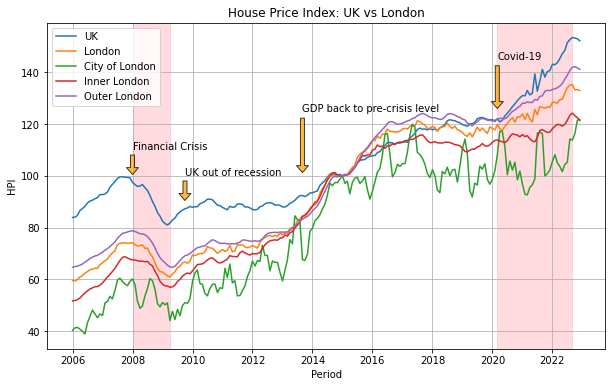

In [22]:
# UK vs London vs London by Region House Price Index comparison

plt.figure(figsize=(10,6))

plt.plot(uk_df['House price index All property types'], label='UK')
plt.plot(london_df['House price index All property types'], label='London')
plt.plot(cityoflondon_df['House price index All property types'], label='City of London')
plt.plot(innerlondon_df['House price index All property types'], label='Inner London')
plt.plot(outerlondon_df['House price index All property types'], label='Outer London')

plt.title('House Price Index: UK vs London')
plt.ylabel('HPI')
plt.xlabel('Period')
plt.legend(loc="upper left")
plt.grid(True)

plt.axvspan(datetime(2008, 1, 1), datetime(2009, 4, 1), color='lightpink', alpha=0.5)
plt.axvspan(datetime(2020, 3, 1), datetime(2022, 9, 1), color='lightpink', alpha=0.5)

plt.annotate('Financial Crisis', xy =(datetime(2008, 1, 1), 100),
                xytext =(datetime(2008, 1, 1), 110),arrowprops = dict(facecolor ='orange',
                shrink = 0.05, alpha = 0.75, headlength = 7), xycoords = 'data')
plt.annotate('UK out of recession', xy =(datetime(2009, 10, 1), 90),
                xytext =(datetime(2009, 10, 1), 100),arrowprops = dict(facecolor ='orange',
                shrink = 0.05, alpha = 0.75, headlength = 7), xycoords = 'data')
plt.annotate('GDP back to pre-crisis level', xy =(datetime(2013, 9, 1), 100),
                xytext =(datetime(2013, 9, 1), 125),arrowprops = dict(facecolor ='orange',
                shrink = 0.05, alpha = 0.75, headlength = 7), xycoords = 'data')
plt.annotate('Covid-19', xy =(datetime(2020, 3, 1), 125),
                xytext =(datetime(2020, 3, 1), 145),arrowprops = dict(facecolor ='orange',
                shrink = 0.05, alpha = 0.75, headlength = 7), xycoords = 'data')

plt.show()

In [23]:
# Calculate average house price increase from March 2020 to September 2022 in inner and outer London.

covid_innerL_increase = (innerlondon_df.loc['2022-09-01', 'Average price All property types'] - innerlondon_df.loc['2020-03-01', 'Average price All property types']) / innerlondon_df.loc['2020-03-01', 'Average price All property types'] * 100
covid_outerL_increase = (outerlondon_df.loc['2022-09-01', 'Average price All property types'] - outerlondon_df.loc['2020-03-01', 'Average price All property types']) / outerlondon_df.loc['2020-03-01', 'Average price All property types'] * 100

print('Between March 2022 and September 2022, London prices increases by:')
print(f'Inner London: {covid_innerL_increase:.1f}%.')
print(f'Outer London: {covid_outerL_increase:.1f}%')


Between March 2022 and September 2022, London prices increases by:
Inner London: 9.1%.
Outer London: 16.4%


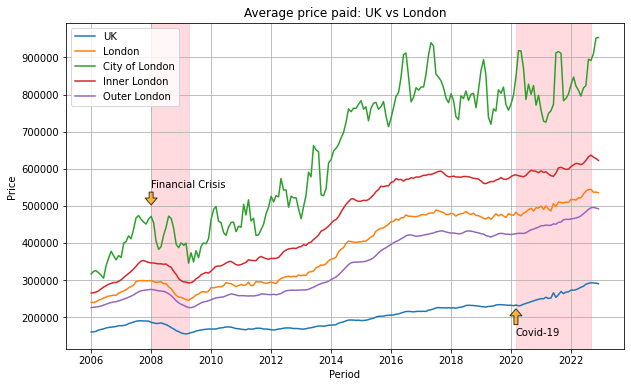

In [24]:
# UK vs London vs London by Region average price paid all property types comparison

plt.figure(figsize=(10,6))

plt.plot(uk_df['Average price All property types'], label='UK')
plt.plot(london_df['Average price All property types'], label='London')
plt.plot(cityoflondon_df['Average price All property types'], label='City of London')
plt.plot(innerlondon_df['Average price All property types'], label='Inner London')
plt.plot(outerlondon_df['Average price All property types'], label='Outer London')

plt.title('Average price paid: UK vs London')
plt.ylabel('Price')
plt.xlabel('Period')
plt.legend(loc="upper left")
plt.grid(True)

plt.axvspan(datetime(2008, 1, 1), datetime(2009, 4, 1), color='lightpink', alpha=0.5)
plt.axvspan(datetime(2020, 3, 1), datetime(2022, 9, 1), color='lightpink', alpha=0.5)

plt.annotate('Financial Crisis', xy =(datetime(2008, 1, 1), 500000),
                xytext =(datetime(2008, 1, 1), 550000),arrowprops = dict(facecolor ='orange',
                shrink = 0.05, alpha = 0.75, headlength = 7), xycoords = 'data')
plt.annotate('Covid-19', xy =(datetime(2020, 3, 1), 225000),
                xytext =(datetime(2020, 3, 1), 150000),arrowprops = dict(facecolor ='orange',
                shrink = 0.05, alpha = 0.75, headlength = 7), xycoords = 'data')


plt.show()

#### 2. How did the volume of sales evolve during the period analysed?

When looking at the volume of sales in London since 2006, we can see three main periods of interest.
First of all, we can note an important decrease in activity during 2007 and 2008 due to the global financial crisis.
Next, we see an spike in sales volumes during the first trimester of 2016, caused by a rush to beat the introduction of the higher rates on additional properties in April 2016. Source: [theguardian.com](https://www.theguardian.com/money/2016/apr/21/rush-to-beat-stamp-duty-changes-causes-surge-in-housing-market-activity).
Finally, we see another important increase in the number of sales during the first part of 2021, when investors rushed to complete transactions to take advantage of stamp duty discounts which lasted until the end of June 2021. Source: [theguardian.com](https://www.theguardian.com/business/2021/jul/21/uk-record-houses-sold-in-a-month-stamp-duty)

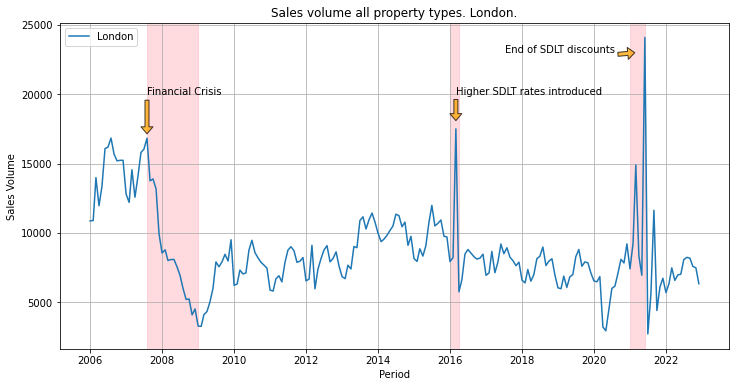

In [25]:
# London sales volume all property types

plt.figure(figsize=(12,6))

plt.plot(london_df['Sales volume'], label='London')

plt.title('Sales volume all property types. London.')
plt.ylabel('Sales Volume')
plt.xlabel('Period')
plt.legend(loc="upper left")
plt.grid(True)

plt.axvspan(datetime(2007, 8, 1), datetime(2009, 1, 1), color='lightpink', alpha=0.5)
plt.axvspan(datetime(2016, 1, 1), datetime(2016, 4, 1), color='lightpink', alpha=0.5)
plt.axvspan(datetime(2021, 1, 1), datetime(2021, 6, 1), color='lightpink', alpha=0.5)

plt.annotate('Financial Crisis', xy =(datetime(2007, 8, 1), 17000),
                xytext =(datetime(2007, 8, 1), 20000),arrowprops = dict(facecolor ='orange',
                shrink = 0.05, alpha = 0.75, headlength = 7), xycoords = 'data')
plt.annotate('Higher SDLT rates introduced', xy =(datetime(2016, 3, 1), 18000),
                xytext =(datetime(2016, 3, 1), 20000),arrowprops = dict(facecolor ='orange',
                shrink = 0.05, alpha = 0.75, headlength = 7), xycoords = 'data')
plt.annotate('End of SDLT discounts', xy =(datetime(2021, 3, 1), 23000),
                xytext =(datetime(2020, 8, 1), 23000),arrowprops = dict(facecolor ='orange',
                shrink = 0.05, alpha = 0.75, headlength = 7), xycoords = 'data', horizontalalignment = 'right')

plt.show()

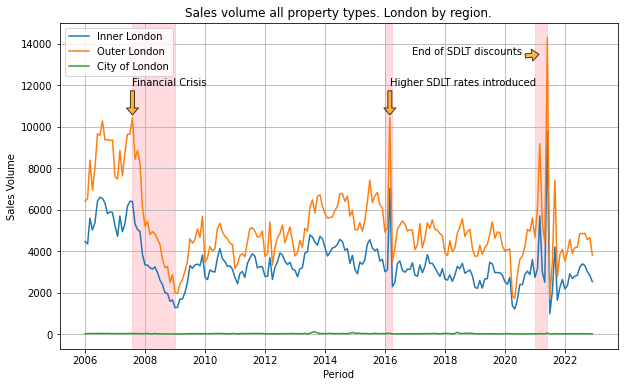

In [27]:
# London by region sales volume all property types

plt.figure(figsize=(10,6))

plt.plot(innerlondon_df['Sales volume'], label='Inner London')
plt.plot(outerlondon_df['Sales volume'], label='Outer London')
plt.plot(cityoflondon_df['Sales volume'], label='City of London')

plt.title('Sales volume all property types. London by region.')
plt.ylabel('Sales Volume')
plt.xlabel('Period')
plt.legend(loc="upper left")
plt.grid(True)

plt.axvspan(datetime(2007, 8, 1), datetime(2009, 1, 1), color='lightpink', alpha=0.5)
plt.axvspan(datetime(2016, 1, 1), datetime(2016, 4, 1), color='lightpink', alpha=0.5)
plt.axvspan(datetime(2021, 1, 1), datetime(2021, 6, 1), color='lightpink', alpha=0.5)

plt.annotate('Financial Crisis', xy =(datetime(2007, 8, 1), 10500),
                xytext =(datetime(2007, 8, 1), 12000),arrowprops = dict(facecolor ='orange',
                shrink = 0.05, alpha = 0.75, headlength = 7), xycoords = 'data')
plt.annotate('Higher SDLT rates introduced', xy =(datetime(2016, 3, 1), 10500),
                xytext =(datetime(2016, 3, 1), 12000),arrowprops = dict(facecolor ='orange',
                shrink = 0.05, alpha = 0.75, headlength = 7), xycoords = 'data')
plt.annotate('End of SDLT discounts', xy =(datetime(2021, 3, 1), 13500),
                xytext =(datetime(2020, 8, 1), 13500),arrowprops = dict(facecolor ='orange',
                shrink = 0.05, alpha = 0.75, headlength = 7), xycoords = 'data', horizontalalignment = 'right')

plt.show()

#### 3. How do prices by property type compare?

Excluding the period between 2007 and 2008 during the global financial crisis, we can see that the house price index for all property types has increased at a similar rate until 2016, where the price index of houses of all types (terraced, semi-detached and detached) started to increase at a faster rate than flats and maisonettes. We can particularly see this tendency to solidify during the Covid-19 pandemic. As a result of the lockdowns, buyers have started to prioritise more space, especially outdoors, which explains this change in demand patterns.
(https://www.standard.co.uk/homesandproperty/property-news/london-housing-market-flats-house-prices-flat-prices-b1072283.html)

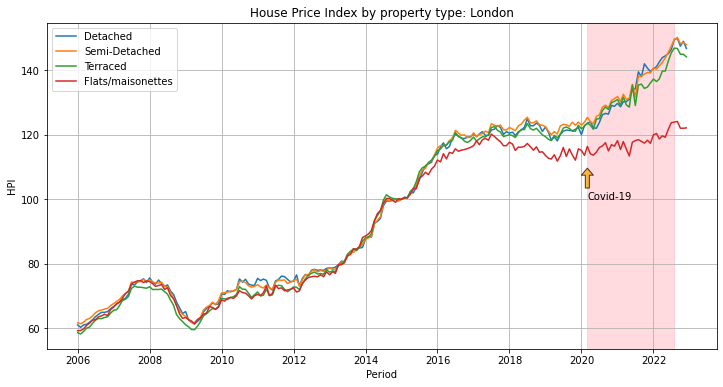

In [28]:
# London House Price Index by property type

plt.figure(figsize=(12,6))

plt.plot(london_df['House price index Detached houses'], label='Detached')
plt.plot(london_df['House price index Semi-detached houses'], label='Semi-Detached')
plt.plot(london_df['House price index Terraced houses'], label='Terraced')
plt.plot(london_df['House price index Flats and maisonettes'], label='Flats/maisonettes')

plt.title('House Price Index by property type: London')
plt.ylabel('HPI')
plt.xlabel('Period')
plt.legend(loc="upper left")
plt.grid(True)

plt.axvspan(datetime(2020, 3, 1), datetime(2022, 8, 1), color='lightpink', alpha=0.5)

plt.annotate('Covid-19', xy =(datetime(2020, 3, 1), 110),
                xytext =(datetime(2020, 3, 1), 100),arrowprops = dict(facecolor ='orange',
                shrink = 0.05, alpha = 0.75, headlength = 7), xycoords = 'data')

plt.show()

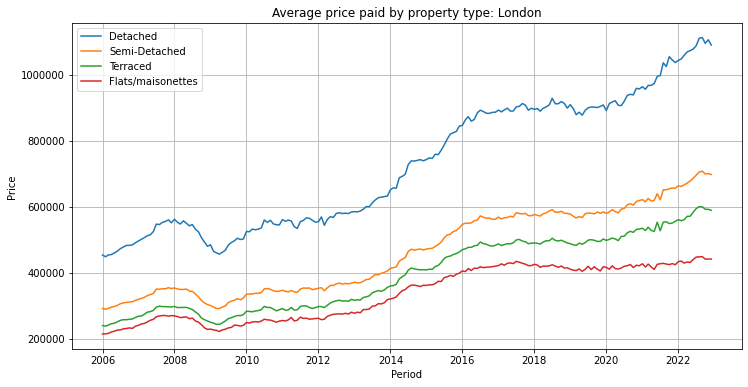

In [29]:
# London Average price paid by property type

plt.figure(figsize=(12,6))

plt.plot(london_df['Average price Detached houses'], label='Detached')
plt.plot(london_df['Average price Semi-detached houses'], label='Semi-Detached')
plt.plot(london_df['Average price Terraced houses'], label='Terraced')
plt.plot(london_df['Average price Flats and maisonettes'], label='Flats/maisonettes')

plt.title('Average price paid by property type: London')
plt.ylabel('Price')
plt.xlabel('Period')
plt.legend(loc="upper left")
plt.grid(True)
plt.ticklabel_format(style='plain', useOffset=False, axis='y')

plt.show()

#### 4. How are buyers financing their purchases?

Across the years examined, on average, 77% of transactions were financed with a mortgage. During the period of low interest rates between 2012 and the beggining of 2022 the proportion of mortgage purchases shows a tendency to increase.

In [47]:
# Calculate proportion of purchases financed by each method per year

finmethod_df_london = london_df.groupby(london_df['Period'].dt.year)[['Sales volume Mortgage purchases', 'Sales volume Cash purchases']].sum()
zerovalues = finmethod_df_london[(finmethod_df_london['Sales volume Mortgage purchases'] == 0) | (finmethod_df_london['Sales volume Cash purchases'] == 0) ].index
finmethod_df_london.drop(zerovalues, inplace=True)
finmethod_df_london['Mortgage Purchases Percentage'] = round(finmethod_df_london['Sales volume Mortgage purchases'] / (finmethod_df_london['Sales volume Mortgage purchases'] + finmethod_df_london['Sales volume Cash purchases']) * 100, 1)
finmethod_df_london['Cash Purchases Percentage'] = round(finmethod_df_london['Sales volume Cash purchases'] / (finmethod_df_london['Sales volume Mortgage purchases'] + finmethod_df_london['Sales volume Cash purchases']) * 100, 1)
finmethod_df_london

,Sales volume Mortgage purchases,Sales volume Cash purchases,Mortgage Purchases Percentage,Cash Purchases Percentage
Period,,,,
2012,70190.0,23668.0,74.8,25.2
2013,82768.0,29205.0,73.9,26.1
2014,91237.0,30704.0,74.8,25.2
2015,88619.0,27837.0,76.1,23.9
2016,80442.0,24297.0,76.8,23.2
2017,73362.0,22633.0,76.4,23.6
2018,71455.0,18396.0,79.5,20.5
2019,68925.0,16206.0,81.0,19.0
2020,58604.0,13965.0,80.8,19.2


In [45]:
# Calculate percentage of purchases financed with a mortgage across all the years analysed

mortgage_perc = round(finmethod_df_london['Sales volume Mortgage purchases'].sum() / (finmethod_df_london['Sales volume Mortgage purchases'].sum() + finmethod_df_london['Sales volume Cash purchases'].sum()) * 100, 1)
print(mortgage_perc)

77.4


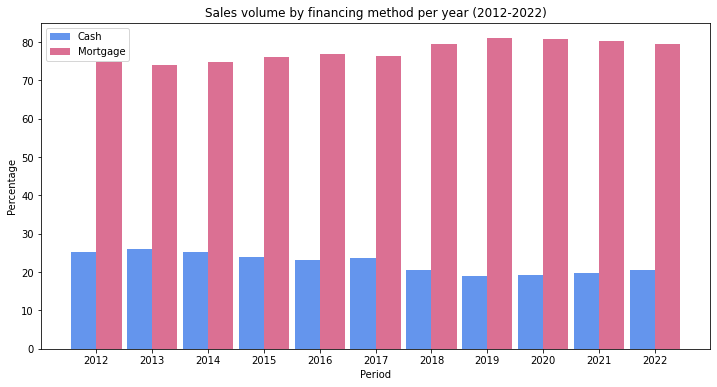

In [46]:
# London Property Sales by financing method per year (2012-2022)

plt.figure(figsize=(12,6))

plt.bar([a-0.45 for a in finmethod_df_london.index], finmethod_df_london['Cash Purchases Percentage'], width= 0.45, color='cornflowerblue', label='Cash', align='edge')
plt.bar([a+0.45 for a in finmethod_df_london.index], finmethod_df_london['Mortgage Purchases Percentage'], width= -0.45, color='palevioletred', label='Mortgage', align='edge')

plt.title('Sales volume by financing method per year (2012-2022)')
plt.ylabel('Percentage')
plt.xlabel('Period')
plt.xticks(finmethod_df_london.index)
plt.legend(loc="upper left")

plt.show()